In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

import csv
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import pickle
from joblib import dump, load

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(f"Shape of test.csv: {test.shape}")
print(f"Shape of train.csv: {train.shape}")
print(train.shape[0]/test.shape[0])

Shape of test.csv: (115064, 4)
Shape of train.csv: (421570, 5)
3.663787109782382


In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [9]:
stores = pd.read_csv("stores.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:

print("Types of stores:")
stores['Type'].value_counts()

Types of stores:


A    22
B    17
C     6
Name: Type, dtype: int64

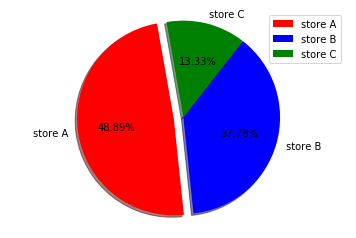

In [15]:
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['Red', 'Blue', 'Green']
explode = (0.1, 0, 0)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=100)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

In [17]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [18]:
store_sale = pd.concat([stores['Type'], train['Weekly_Sales']], axis=1)
store_sale


,Type,Weekly_Sales
0,A,24924.50
1,A,46039.49
2,B,41595.55
3,A,19403.54
4,B,21827.90
...,...,...
421565,NaN,508.37
421566,NaN,628.10
421567,NaN,1061.02
421568,NaN,760.01


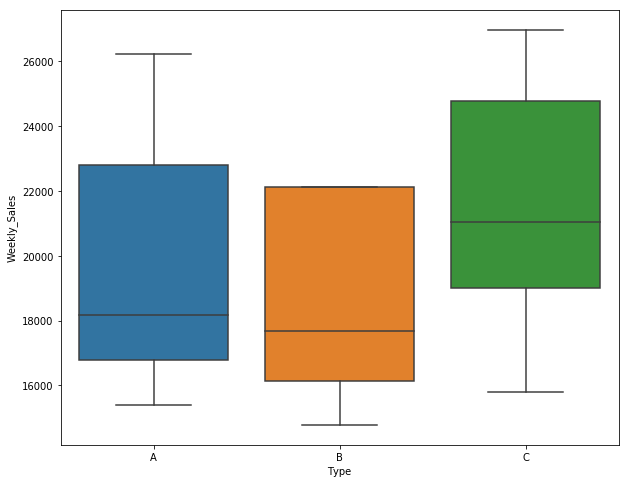

In [19]:
f, a = plt.subplots(figsize=(10, 8))
fig2 = sb.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

In [20]:
storeType = pd.concat([stores['Type'], stores['Size']], axis=1)
storeType

,Type,Size
0,A,151315
1,A,202307
2,B,37392
3,A,205863
4,B,34875
5,A,202505
6,B,70713
7,A,155078
8,B,125833
9,B,126512


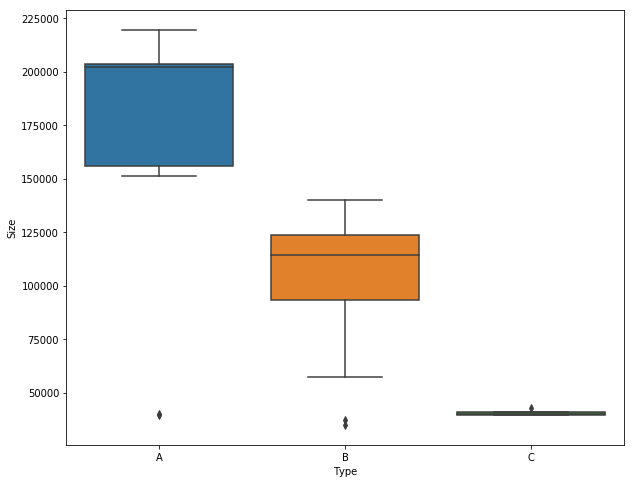

In [21]:
fg, ax = plt.subplots(figsize=(10, 8))
fig = sb.boxplot(x='Type', y='Size', data=storeType)

In [22]:
features = pd.read_csv("features.csv")
print(f"Shape of features.csv: {features.shape}")
features.head()

Shape of features.csv: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [26]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['Year'] =train['Date'].dt.year
test['Year'] =test['Date'].dt.year

train['Month'] =train['Date'].dt.month 
test['Month'] =test['Date'].dt.month 

train['Day'] =train['Date'].dt.day 
test['Day'] =test['Date'].dt.day

train['Week'] = train['Date'].dt.week
test['Week'] = test['Date'].dt.week

train['Day_of_week'] =train['Date'].dt.dayofweek
test['Day_of_week'] =test['Date'].dt.dayofweek

ValueError: color kwarg must have one color per dataset

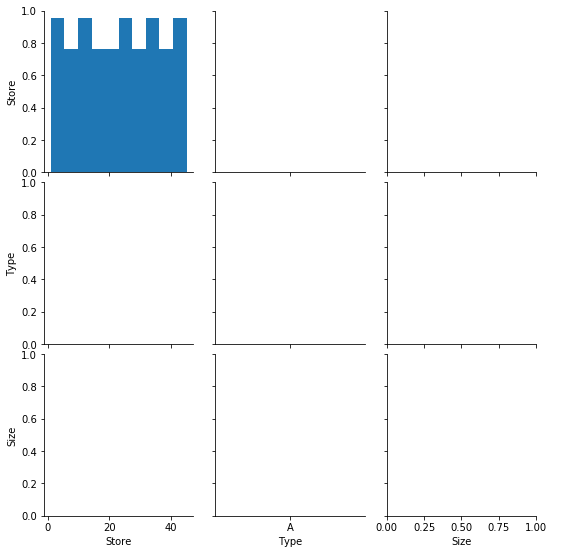

In [28]:
sb.pairplot(stores, vars=['Store','Type','Size'])

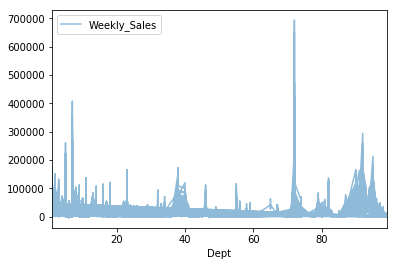

In [29]:
train.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 10 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Year            421570 non-null int64
Month           421570 non-null int64
Day             421570 non-null int64
Week            421570 non-null int64
Day_of_week     421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(7)
memory usage: 29.3 MB


In [31]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day,Week,Day_of_week
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,4
1,1,1,2010-02-12,46039.49,True,2010,2,12,6,4
2,1,1,2010-02-19,41595.55,False,2010,2,19,7,4
3,1,1,2010-02-26,19403.54,False,2010,2,26,8,4
4,1,1,2010-03-05,21827.90,False,2010,3,5,9,4
...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2012,9,28,39,4
421566,45,98,2012-10-05,628.10,False,2012,10,5,40,4
421567,45,98,2012-10-12,1061.02,False,2012,10,12,41,4
421568,45,98,2012-10-19,760.01,False,2012,10,19,42,4


In [34]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [32]:
features['Date'] = pd.to_datetime(features['Date'])

In [33]:
train_feats = pd.merge_asof(train, features, on='Store',by='Date')
test_feats = pd.merge_asof(test, features, on='Store',by='Date')

train_feats.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Year,Month,Day,Week,Day_of_week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,4,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,2010,2,12,6,4,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,2010,2,19,7,4,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,2010,2,26,8,4,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,2010,3,5,9,4,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [35]:
train_final_feats = pd.merge(train_feats,stores)
test_final_feats = pd.merge(test_feats,stores)

pd.set_option('display.max_columns', None)  
train_final_feats[:1]


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Year,Month,Day,Week,Day_of_week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.5,False,2010,2,5,5,4,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [36]:
print(train_final.isnull().sum())
print("--" * 50)
print(test_final.isnull().sum())

NameError: name 'train_final' is not defined

In [37]:
train_final=train_final.fillna(0)
test_final=test_final.fillna(0)
train_final.head()

NameError: name 'train_final' is not defined